In [1]:
import os
import tweepy
import pandas as pd
from dotenv import load_dotenv, find_dotenv

env_path = find_dotenv()
load_dotenv(env_path)
bearer_token = os.getenv('BEARER_TOKEN')

In [2]:
client = tweepy.Client(bearer_token=bearer_token)

In [3]:
query = '"iphone 7" lang:pt'
#['word', '"words"', 'word1 OR word2, '@mention', '#hashtag', 'to:account', 'since:year-month-day']
# queries can be 512 characters long

In [4]:
tweets = client.search_recent_tweets(query=query, 
                                     tweet_fields=['author_id','created_at','source','entities'],
                                     max_results=10)

In [5]:
for tweet in tweets.data:
    print(tweet.text)
    print(f"Tweet id : {tweet.id}")
    print(f"Author id : {tweet.author_id}")
    print(f"Date : {tweet.created_at}")
    print(f"Source : {tweet.source}")
    if tweet.entities != None :
        if 'hashtags' in tweet.entities.keys():
            for i in range(len(tweet.entities['hashtags'])):
                hashtags = []
                hashtags.append(tweet.entities['hashtags'][i]['tag'])
            print(f"Hashtags : {hashtags}")
    print('------')

Vocês são muito folgados pah, na minha época usávamos iPhone 7, aquele bloco mesmo, mas ligávamos, tirávamos foto ali mesmo, fazíamos trabalho.
Agora vocês só querem lamborghini voadora, sabe quanto custa aquilo???
Mimados!
Tweet id : 1507044263745495043
Author id : 1071683025057009665
Date : 2022-03-24 17:18:46+00:00
Source : Twitter for iPhone
------
Tô indecisa se pego o iPhone 7 Plus ou 8 normal 🤦🏽‍♀️
Tweet id : 1507027182278918144
Author id : 1017080815283589120
Date : 2022-03-24 16:10:54+00:00
Source : Twitter for iPhone
------
@BrbaraQuintao câmera de iphone 7 deixa qualquer um bonito
Tweet id : 1507018938051223552
Author id : 913878304914100224
Date : 2022-03-24 15:38:08+00:00
Source : Twitter for iPhone
------
Se o @Casimiro não for reagir a entrevista do morador de rua mais famoso do Brasil eu sou um iPhone 7
Tweet id : 1507013402283020297
Author id : 1297353504043028480
Date : 2022-03-24 15:16:08+00:00
Source : Twitter for iPhone
------
Troca da tela e aplicação de película 

In [6]:
def hashtag_list(tweet):
    hashtags = []
    if tweet.entities != None :
        if 'hashtags' in tweet.entities.keys():
            for i in range(len(tweet.entities['hashtags'])):
                hashtags.append(tweet.entities['hashtags'][i]['tag'])
    return hashtags

In [7]:
tweets_search = [[],[],[],[],[]]
for tweet in tweets.data :
    tweets_search[0].append(tweet.text)
    tweets_search[1].append(tweet.author_id)
    tweets_search[2].append(tweet.created_at)
    tweets_search[3].append(tweet.source)
    tweets_search[4].append(hashtag_list(tweet))

In [8]:
tweets_search

[['Vocês são muito folgados pah, na minha época usávamos iPhone 7, aquele bloco mesmo, mas ligávamos, tirávamos foto ali mesmo, fazíamos trabalho.\nAgora vocês só querem lamborghini voadora, sabe quanto custa aquilo???\nMimados!',
  'Tô indecisa se pego o iPhone 7 Plus ou 8 normal 🤦🏽\u200d♀️',
  '@BrbaraQuintao câmera de iphone 7 deixa qualquer um bonito',
  'Se o @Casimiro não for reagir a entrevista do morador de rua mais famoso do Brasil eu sou um iPhone 7',
  'Troca da tela e aplicação de película 3D iPhone 7 Plus (A1784).\n\nAvenida 15 de Novembro, 1182 - Centro, ao lado da Rua São Lourenço - Matão/SP, fone (16)98832-8951.\n\nQuebrou seu smartphone? Sua TV não liga mais? Não consegue jogar seu game preferido? Venha para a CS Matão. https://t.co/mtS0odFNpV',
  'RT @hink3l: alguma alma boa tem capinha de iphone 7/8 pra rolo?',
  'alguma alma boa tem capinha de iphone 7/8 pra rolo?',
  'RT @sereitati: celular já tá dando uns bug, tbm né, iPhone 7 32gb kkkkkkkkkkk quase 6 anos com ess

In [9]:
from thermofeeler.utils import preproc_func

In [10]:
preproc_tweets=[]
for tweet in tweets_search[0]:
    preproc_tweets.append(preproc_func(tweet))

In [11]:
preproc_tweets[0]

['folgados',
 'pah',
 'época',
 'usávamos',
 'iphone',
 'bloco',
 'mas',
 'ligávamos',
 'tirávamos',
 'foto',
 'ali',
 'fazíamos',
 'trabalho',
 'agora',
 'querem',
 'lamborghini',
 'voadora',
 'sabe',
 'quanto',
 'custa',
 'mimados']

In [ ]:
#for tweet in tweepy.Paginator(client.search_recent_tweets, query=query,
#                              tweet_fields=['context_annotations', 'created_at'], max_results=100).flatten(limit=1000):
#    print(tweet)

In [12]:
from datetime import datetime, timedelta
tweets_search = []
now = datetime.now() + timedelta(hours=3)
start_time = now - timedelta(days=7)
end_time = now - timedelta(days=6)

for loop in range(6):
    tweets = client.search_recent_tweets(query=query, 
                                     start_time=start_time,
                                     end_time=end_time,
                                     tweet_fields=['author_id','created_at','source','entities'],
                                     max_results=20)
    tweets_search.append(tweets)
    start_time += timedelta(days=1)
    end_time += timedelta(days=1)

In [13]:
tweets_ = [[],[],[],[],[]]
for tweets in tweets_search:
    for tweet in tweets.data :
        tweets_[0].append(tweet.text)
        tweets_[1].append(tweet.author_id)
        tweets_[2].append(tweet.created_at)
        tweets_[3].append(tweet.source)
        tweets_[4].append(hashtag_list(tweet))

In [14]:
len(tweets_[0])

111

In [15]:
import matplotlib.pyplot as plt

In [33]:
import numpy as np
L = np.random.randint(-1,2,111)
L = L.tolist()

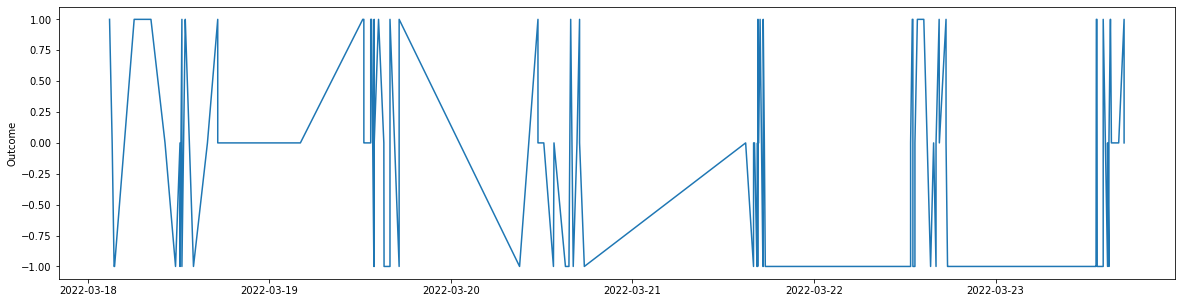

In [35]:
plt.figure(figsize=(20,5))
plt.plot(sorted(tweets_[2]), L)
plt.ylabel("Outcome")
plt.;